# Data Augmentation

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0" #model will be trained on GPU 1

In [3]:
import os
#import cv2
import tensorflow.keras
# from tensorflow.keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from tensorflow.keras.layers import Input,Dense,Flatten,Dropout,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adadelta, RMSprop,SGD,Adam
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K

In [4]:
# Muestro la version de keras
tensorflow.keras.__version__

'2.3.0-tf'

In [5]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

In [6]:
get_available_gpus()

['/device:GPU:0']

In [7]:
#import tensorflow as tf
#tf.test.is_gpu_available() Deprecated
#tf.config.list_physical_devices('GPU')

In [8]:
#tf.config.experimental.list_physical_devices('GPU')

In [9]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [10]:
import numpy as np
import scipy.misc
import numpy.random as rng
from PIL import Image, ImageDraw, ImageFont
from sklearn.utils import shuffle
import nibabel as nib #reading MR images
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
import math
import glob
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
#ff = glob.glob('./ground3T/*')
ff = glob.glob('./IXI-T1/*')

In [12]:
ff[0]

'../IXI-T1\\IXI002-Guys-0828-T1.nii.gz'

In [13]:
len(ff)

581

In [14]:
# Load the filenames in path
individuals = glob.glob('./IXI-T1/*.nii.gz')

In [246]:
from urllib.request import urlretrieve
import os

import itk

from itkwidgets import view

In [381]:
os.getcwd()

'C:\\Users\\LG\\Documents\\2020\\00-UOC\\TFM\\0301-Preprocess_IXI'

In [18]:
import nibabel as nib
img = nib.load(ind[0])
data = img.get_fdata()
data.shape

(64, 64, 35, 166)

In [19]:
data = data.astype(np.float32)

In [20]:
vol0 = data[..., 0]
vol1 = data[..., 1]
vol1.shape

(64, 64, 35)

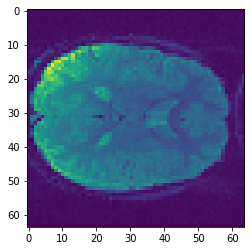

In [21]:
mid_vol0 = vol0[:, :, 17]
plt.imshow(mid_vol0)

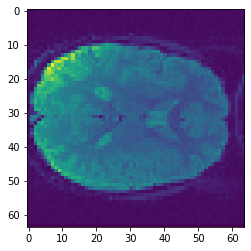

In [22]:
mid_vol1 = vol1[:, :, 17]
plt.imshow(mid_vol1)

Text(0.5, 1.0, 'slice 1')

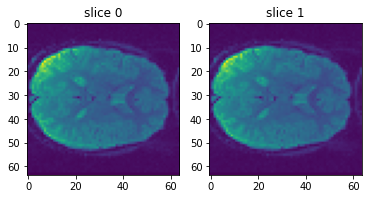

In [23]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(mid_vol0)
axes[0].set_title('slice 0')
axes[1].imshow(mid_vol1)
axes[1].set_title('slice 1')

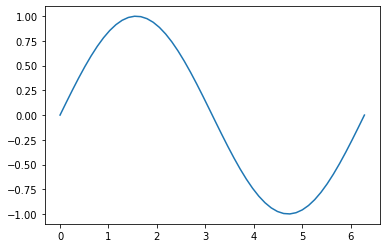

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

In [72]:
%matplotlib notebook
%matplotlib inline

from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()

interact(update);

In [68]:
# Load the filenames in path
individuals = glob.glob('../IXI-T1/*.nii.gz')

In [69]:
sample = nib.load(individuals[0])
sample_data = sample.get_fdata()
print("Sample shape:" , sample.shape)

Sample shape: (256, 256, 150)


C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


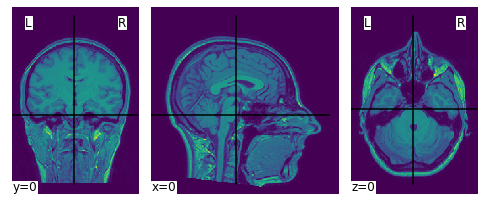

In [73]:
from nilearn import plotting
from nilearn.plotting import view_img, glass_brain, plot_anat, plot_epi
display = plotting.plot_img(sample, display_mode ='ortho', cut_coords=[0,0,0])

In [77]:
print(sample.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 150   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.        0.9375    0.9375    1.199997  0.        0.        0.
  0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'MR'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.468175
quatern_c       : -0.5299171
quatern_d       : -0.468175
qoffset_x       : -88.63989
qoffset_y       : 116.

In [75]:
sample = nib.load(individuals[0])
A = np.vstack((volume_info['xras'],
               volume_info['yras'],
               volume_info['zras'])).T * volume_info['voxelsize']


In [35]:
extra_shape = tuple([2*x for x in sample.shape])

In [38]:
extra_sample = np.zeros(extra_shape)

In [41]:
offset_x = (extra_shape[0]-sample.shape[0])//2
offset_y = (extra_shape[1]-sample.shape[1])//2
offset_z = (extra_shape[2]-sample.shape[2])//2
print(offset_x, offset_y, offset_z)

128 128 75


In [65]:
extra_sample[offset_x:(sample.shape[0]+offset_x),
             offset_y:(sample.shape[1]+offset_y),
             offset_z:(sample.shape[2]+offset_z)] = sample_data

In [66]:
from nibabel.nifti1 import Nifti1Header
hdr = Nifti1Header()
hdr.set_data_shape(extra_sample.shape)
hdr.set_zooms(sample.header.get_zooms())
new_img = nib.Nifti1Image(extra_sample, sample.affine, hdr)

In [60]:
sample.affine[3] = sample.affine[3] + [-256*0.9375, +256*0.9375, -150*1.2, 0]

In [61]:
sample.affine

array([[ 0.00000000e+00,  0.00000000e+00,  1.19999695e+00,
        -8.86398926e+01],
       [-9.30352330e-01,  1.15545668e-01,  0.00000000e+00,
         1.16532005e+02],
       [ 1.15545668e-01,  9.30352330e-01, -2.49799545e-16,
        -1.12113556e+02],
       [-2.40000000e+02,  2.40000000e+02, -1.80000000e+02,
         1.00000000e+00]])

In [62]:
new_img = nib.Nifti1Image(extra_sample, sample.affine, hdr)

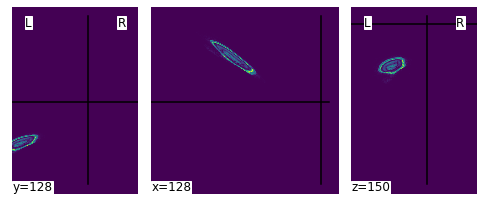

In [67]:
display2 = plotting.plot_img(new_img, display_mode ='ortho', cut_coords=[128,128,150])

In [30]:
import numpy.linalg as npl
from scipy.ndimage import affine_transform
import nibabel as nib
from nibabel.eulerangles import euler2mat

X_INF, Y_INF, Z_INF = -90, -90, -90
X_SUP, Y_SUP, Z_SUP = 90, 90, 90
STEP = 5

#x = np.linspace(X_INF, X_SUP, 1+(X_SUP-X_INF)//STEP)
# x = np.arange(X_INF, X_SUP+1, STEP)
# y = np.arange(Y_INF, Y_SUP+1, STEP)
# z = np.arange(Z_INF, Z_SUP+1, STEP)


x = 15
y = 0
z = 0
x_rot = np.radians(x)
y_rot = np.radians(y)
z_rot = np.radians(z)
Mx = euler2mat(x=x_rot)
My = euler2mat(y=y_rot)
Mz = euler2mat(z=z_rot)
orig_to_new = Mz.dot(My).dot(Mx)
new_to_orig = npl.inv(orig_to_new)
rotated_vol0 = affine_transform(sample_data, new_to_orig, order=1)

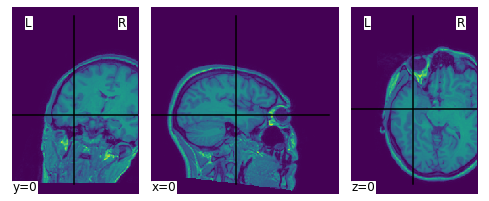

In [31]:
new_img = nib.Nifti1Image(rotated_vol0, sample.affine, sample.header)

In [1]:
import ipywidgets as widgets
caption = widgets.Label(value='The values of slider1 and slider2 are synchronized')
sliders1, slider2 = widgets.IntSlider(description='Slider 1'),\
                    widgets.IntSlider(description='Slider 2')
l = widgets.link((sliders1, 'value'), (slider2, 'value'))
display(caption, sliders1, slider2)

Label(value='The values of slider1 and slider2 are synchronized')

IntSlider(value=0, description='Slider 1')

IntSlider(value=0, description='Slider 2')

In [78]:
sample = nib.load(individuals[0])
sample_data = sample.get_fdata()
print("Sample shape:" , sample.shape)

Sample shape: (256, 256, 150)


In [79]:
epi_vox_center = (np.array(sample_data.shape) - 1) / 2.

In [80]:
print(epi_vox_center)

[127.5 127.5  74.5]


In [82]:
M = sample.affine[:3, :3]
abc = sample.affine[:3, 3]
def f(i, j, k):
    """ Return X, Y, Z coordinates for i, j, k """
    return M.dot([i, j, k]) + abc

In [83]:
f(epi_vox_center[0], epi_vox_center[1], epi_vox_center[2])

array([ 0.75988007, 12.64415584, 21.23843883])

In [85]:
epi_vox_center = (np.array(sample_data.shape) - 1) / 2.
sample.affine.dot(list(epi_vox_center) + [1])

array([ 0.75988007, 12.64415584, 21.23843883,  1.        ])

In [86]:
from nibabel.affines import apply_affine
apply_affine(sample.affine, epi_vox_center)

array([ 0.75988007, 12.64415584, 21.23843883])

In [88]:
import numpy.linalg as npl
epi_vox2anat_vox = npl.inv(sample.affine).dot(sample.affine)

In [89]:
epi_vox2anat_vox

array([[1.00000000e+00, 0.00000000e+00, 8.32830695e-33, 7.10542736e-15],
       [0.00000000e+00, 1.00000000e+00, 3.22651570e-32, 1.42108547e-14],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [91]:
epi_img = nib.load('../Nibabel/someones_epi.nii.gz')
epi_img_data = epi_img.get_fdata()

print("Sample shape:" , epi_img_data.shape)

Sample shape: (53, 61, 33)


Text(0.5, 0.98, 'Center slices for EPI image')

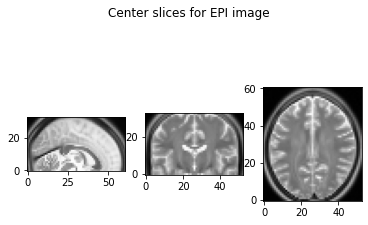

In [93]:
import matplotlib.pyplot as plt
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = epi_img_data[26, :, :]
slice_1 = epi_img_data[:, 30, :]
slice_2 = epi_img_data[:, :, 16]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")

In [95]:
print(epi_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 3 53 61 33  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 3. 3. 3. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.14943813
quatern_c       : -0.0
quatern_d       : -0.0
qoffset_x       : -78.0
qoffset_y       : -76.0
qoffset_z       : -64.0
srow_x          : [  3.   0.   0. -78.]
srow_y          : [

In [96]:
anat_img = nib.load('../Nibabel/someones_anatomy.nii.gz')
anat_img_data = anat_img.get_fdata()
anat_img_data.shape



(57, 67, 56)

Text(0.5, 0.98, 'Center slices for anatomical image')

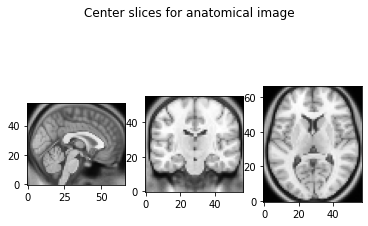

In [97]:
show_slices([anat_img_data[28, :, :],
             anat_img_data[:, 33, :],
             anat_img_data[:, :, 28]])
plt.suptitle("Center slices for anatomical image")  

In [101]:
print(anat_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 3 57 67 56  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1.   2.75 2.75 2.75 1.   1.   1.   1.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -78.0
qoffset_y       : -91.0
qoffset_z       : -91.0
srow_x          : [  2.75   0.     0.   -78.  ]
srow

In [98]:
n_i, n_j, n_k = epi_img_data.shape
center_i = (n_i - 1) // 2  # // for integer division
center_j = (n_j - 1) // 2
center_k = (n_k - 1) // 2
center_i, center_j, center_k

(26, 30, 16)

In [99]:
center_vox_value = epi_img_data[center_i, center_j, center_k]
center_vox_value

81.54928779602051

In [102]:
# Set numpy to print 3 decimal points and suppress small values
import numpy as np
np.set_printoptions(precision=3, suppress=True)
# Print the affine
epi_img.affine

array([[  3.   ,   0.   ,   0.   , -78.   ],
       [  0.   ,   2.866,  -0.887, -76.   ],
       [  0.   ,   0.887,   2.866, -64.   ],
       [  0.   ,   0.   ,   0.   ,   1.   ]])

In [105]:
M = epi_img.affine[:3, :3]
abc = epi_img.affine[:3, 3]

In [106]:
epi_vox_center = (np.array(epi_img_data.shape) - 1) / 2.

In [107]:
f(epi_vox_center[0], epi_vox_center[1], epi_vox_center[2])

array([ 0.   , -4.205,  8.453])

In [108]:
import numpy.linalg as npl
epi_vox2anat_vox = npl.inv(anat_img.affine).dot(epi_img.affine)

In [109]:
print(epi_vox2anat_vox)

[[ 1.091  0.     0.     0.   ]
 [ 0.     1.042 -0.322  5.455]
 [ 0.     0.322  1.042  9.818]
 [ 0.     0.     0.     1.   ]]


In [110]:
apply_affine(epi_vox2anat_vox, epi_vox_center)

array([28.364, 31.562, 36.165])

In [111]:
anat_vox_center = (np.array(anat_img_data.shape) - 1) / 2.
anat_vox_center

array([28. , 33. , 27.5])

In [112]:
scaling_affine = np.array([[3, 0, 0, 0],
                           [0, 3, 0, 0],
                           [0, 0, 3, 0],
                           [0, 0, 0, 1]])

In [117]:
sample = nib.load(individuals[0])
sample_data = sample.get_fdata()
print("Sample shape:" , sample.shape)

Sample shape: (256, 256, 150)


In [114]:
from nibabel.viewers import OrthoSlicer3D

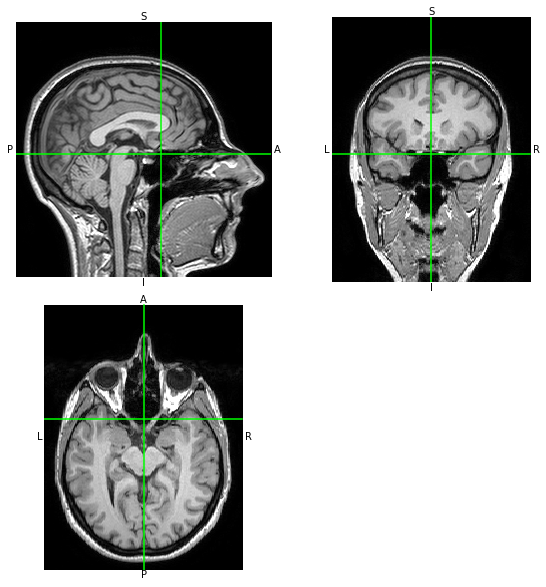

In [156]:
orto = OrthoSlicer3D(sample_data, sample.affine)
orto.set_position(60,60,0)
orto.show()

In [132]:
print(sample.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 150   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.     0.938  0.938  1.2    0.     0.     0.     0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'MR'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.468175
quatern_c       : -0.5299171
quatern_d       : -0.468175
qoffset_x       : -88.63989
qoffset_y       : 116.532005
qoffset_z   

In [157]:
from nibabel.analyze import AnalyzeImage

In [160]:
print(AnalyzeImage(sample_data, sample.affine, sample.header))

<class 'nibabel.analyze.AnalyzeImage'>
data shape (256, 256, 150)
affine: 
[[   0.       0.       1.2    -88.64 ]
 [  -0.93     0.116    0.     116.532]
 [   0.116    0.93    -0.    -112.114]
 [   0.       0.       0.       1.   ]]
metadata:
<class 'nibabel.analyze.AnalyzeHeader'> object, endian='<'
sizeof_hdr     : 348
data_type      : b''
db_name        : b''
extents        : 0
session_error  : 0
regular        : b'r'
hkey_un0       : b''
dim            : [  3 256 256 150   1   1   1   1]
vox_units      : b''
cal_units      : b''
unused1        : 0
datatype       : int16
bitpix         : 16
dim_un0        : 0
pixdim         : [-1.     0.938  0.938  1.2    1.     1.     1.     1.   ]
vox_offset     : 0.0
funused1       : 0.0
funused2       : 0.0
funused3       : 0.0
cal_max        : 0.0
cal_min        : 0.0
compressed     : 0
verified       : 0
glmax          : 0
glmin          : 0
descrip        : b'MR'
aux_file       : b''
orient         : b''
originator     : b''
generated      : b

In [163]:
print(sample.header.get_data_offset())

0


In [168]:
abc = sample.affine[:3, ]

In [171]:
abc

array([[   0.   ,    0.   ,    1.2  ,  -88.64 ],
       [  -0.93 ,    0.116,    0.   ,  116.532],
       [   0.116,    0.93 ,   -0.   , -112.114]])

In [170]:
abc.dot(npl.inv(sample.affine))

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [ ]:
sample.header.set_data_offset(abc)

In [ ]:
import numpy as np
import pylab as pl

# Compute the mean EPI: we do the mean along the axis 3, which is time
mean_img = np.mean(sample_data, axis=2)

# pl.figure() creates a new figure
pl.figure(figsize=(7, 4))

# First subplot: coronal view
# subplot: 1 line, 3 columns and use the first subplot
pl.subplot(1, 3, 1)
# Turn off the axes, we don't need it
pl.axis('off')
# We use pl.imshow to display an image, and use a 'gray' colormap
# we also use np.rot90 to rotate the image
pl.imshow(np.rot90(mean_img[:, 32, :]), interpolation='nearest',
          cmap='gray')
pl.title('Coronal')

# Second subplot: sagittal view
pl.subplot(1, 3, 2)
pl.axis('off')
pl.title('Sagittal')
pl.imshow(np.rot90(mean_img[15, :, :]), interpolation='nearest',
          cmap=pl.cm.gray)

# Third subplot: axial view
pl.subplot(1, 3, 3)
pl.axis('off')
pl.title('Axial')
pl.imshow(np.rot90(mean_img[:, :, 32]), interpolation='nearest',
          cmap=pl.cm.gray)
pl.subplots_adjust(left=.02, bottom=.02, right=.98, top=.95,
                   hspace=.02, wspace=.02)

In [ ]:
# Orgaize the data for visualisation in the coronal plane
coronal = np.transpose(sample_data, [1, 3, 2, 0])
coronal = np.rot90(coronal, 1)

# Orgaize the data for visualisation in the transversal plane
transversal = np.transpose(sample_data, [2, 1, 3, 0])
transversal = np.rot90(transversal, 2)

# Orgaize the data for visualisation in the sagittal plane
sagittal = np.transpose(sample_data, [2, 3, 1, 0])
sagittal = np.rot90(sagittal, 1)

<OrthoSlicer3D: ../IXI-T1\IXI002-Guys-0828-T1.nii.gz (150, 256, 256)>

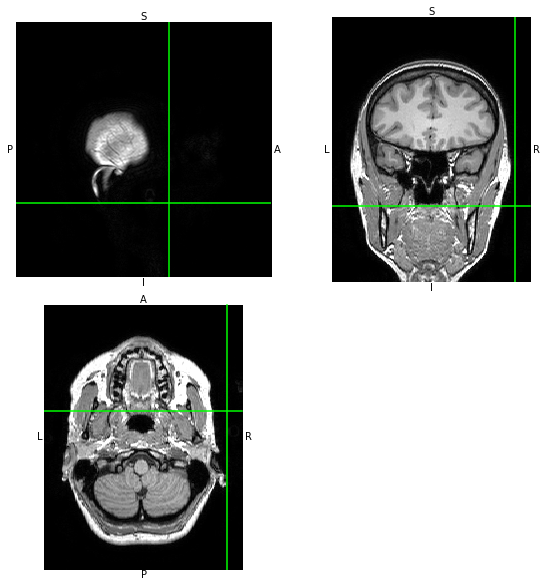

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
TypeError: _cleanup() takes 1 positional argument but 2 were given


In [180]:
sample.orthoview()

(array([6288627.,  234321.,  128457.,   94801.,   90244.,   91834.,
          87075.,   90930.,  100917.,  106094.,  121438.,  155504.,
         187544.,  243932.,  261032.,  239021.,  198139.,  153837.,
         142804.,  167841.,  181620.,  137427.,   79248.,   39258.,
          31993.,   33268.,   31603.,   30533.,   24027.,   18429.,
          13145.,    8451.,    5767.,    3912.,    2439.,    1639.,
           1144.,     683.,     526.,     318.,     205.,     151.,
             89.,      47.,      30.,      26.,      13.,      12.,
              4.,       1.]),
 array([   0.  ,   21.36,   42.72,   64.08,   85.44,  106.8 ,  128.16,
         149.52,  170.88,  192.24,  213.6 ,  234.96,  256.32,  277.68,
         299.04,  320.4 ,  341.76,  363.12,  384.48,  405.84,  427.2 ,
         448.56,  469.92,  491.28,  512.64,  534.  ,  555.36,  576.72,
         598.08,  619.44,  640.8 ,  662.16,  683.52,  704.88,  726.24,
         747.6 ,  768.96,  790.32,  811.68,  833.04,  854.4 ,  875.76,


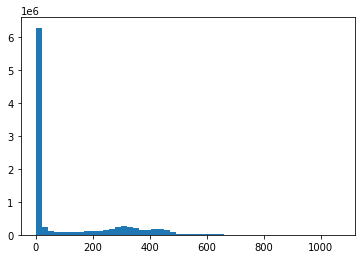

In [181]:
plt.hist(sample_data.flatten(), bins = 50)

In [182]:
t1_mask = sample_data > 100

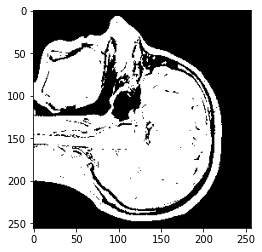

In [187]:
plt.imshow(t1_mask[:,:,75], cmap = 'gray')

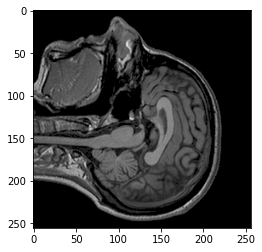

In [189]:
test = np.where(t1_mask, sample_data, 0)
plt.imshow(test[:, :,75], cmap = 'gray')

In [191]:
from nilearn import image as img
invert_img= img.math_img('-a', a=T1)

NameError: name 'T1' is not defined

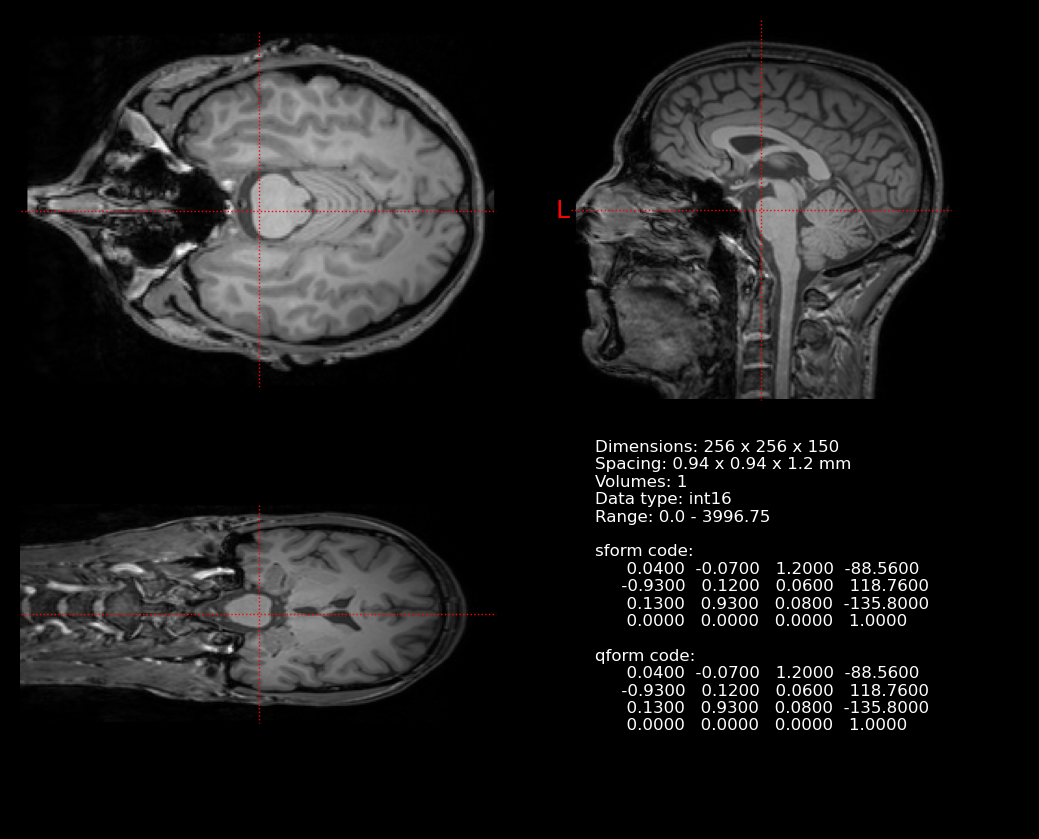

In [332]:
# Reference:
# https://www.vincentkoppelmans.com/neuroscience/quick-visualization-of-nifti-images/
# Quick display of a Nifti image

# Packages
import nibabel as nb
import numpy as np
import os
import sys
from pathlib import Path
import matplotlib.pyplot as plt

# Disable Toolbar for plots
plt.rcParams['toolbar'] = 'None'

# Environment and file names
# home = str(Path.home())
#iFile = sys.argv[1]
iFile = individuals[1]
oFile=(str(os.path.basename(iFile).replace('.nii.gz','.png').replace('.nii','.png')))

# Set rounding
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})



### IMPORT DATA ###
# Load data
image=nb.load(iFile)


# 3D data
if image.header['dim'][0]==3:
    data=image.get_fdata()
    # 4D data
elif  image.header['dim'][0]==4:
    data=image.get_data()[:,:,:,0]

# Header
header=image.header

# Set NAN to 0
data[np.isnan(data)] = 0



### PREPARE SOME PARAMETERS ###

# Spacing for Aspect Ratio
sX=header['pixdim'][1]
sY=header['pixdim'][2]
sZ=header['pixdim'][3]

# Size per slice
lX = data.shape[0]
lY = data.shape[1]
lZ = data.shape[2]

# Middle slice number
mX = int(lX/2)
mY = int(lY/2)
mZ = int(lZ/2)

# True middle point
tmX = lX/2.0
tmY = lY/2.0
tmZ = lZ/2.0



### ORIENTATION ###
qfX = image.get_qform()[0,0]
sfX = image.get_sform()[0,0]

if qfX < 0 and (sfX == 0 or sfX < 0):
    oL = 'R'
    oR = 'L'
elif qfX > 0 and (sfX == 0 or sfX > 0):
    oL = 'L'
    oR = 'R'
if sfX < 0 and (qfX == 0 or qfX < 0):
    oL = 'R'
    oR = 'L'
elif sfX > 0 and (qfX == 0 or qfX > 0):
    oL = 'L'
    oR = 'R'



### PLOTTING ###

# Plot main window
fig = plt.figure(
    facecolor='black',
    figsize=(5,4),
    dpi=200
)

# Black background
plt.style.use('dark_background')

# Set title
fig.canvas.set_window_title(oFile.replace('.png',''))


# Coronal
ax1=fig.add_subplot(2,2,1)
imgplot = plt.imshow(
    np.rot90(data[:,mY,:]),
    aspect=sZ/sX,
)
imgplot.set_cmap('gray')

ax1.hlines(tmZ, 0, lX, colors='red', linestyles='dotted', linewidth=.5)
ax1.vlines(tmX, 0, lZ, colors='red', linestyles='dotted', linewidth=.5)

plt.axis('off')


# Sagittal
ax2=fig.add_subplot(2,2,3)
imgplot = plt.imshow(
    np.rot90(data[mX,:,:]),
    aspect=sY/sZ,
)
imgplot.set_cmap('gray')

ax2.hlines(tmZ, 0, lY, colors='red', linestyles='dotted', linewidth=.5)
ax2.vlines(tmY, 0, lZ, colors='red', linestyles='dotted', linewidth=.5)

plt.axis('off')


# Axial
ax3=fig.add_subplot(2,2,2)
imgplot = plt.imshow(
    np.rot90(data[:,:,mZ]),
    aspect=sY/sX
)
imgplot.set_cmap('gray')

ax3.hlines(tmY, 0, lX, colors='red', linestyles='dotted', linewidth=.5)
ax3.vlines(tmX, 0, lY, colors='red', linestyles='dotted', linewidth=.5)

plt.axis('off')

plt.text(-10, mY+5, oL, fontsize=9, color='red') # Label on left side


# Textual information
# sform code
sform=np.round(image.get_sform(),decimals=2)
sform_txt=str(sform).replace('[',' ').replace(']',' ').replace(' ','   ').replace('   -','  -')

# qform code
qform=np.round(image.get_qform(),decimals=2)
qform_txt=str(qform).replace('[',' ').replace(']',' ').replace(' ','   ').replace('   -','  -')

# Dimensions
dims=str(data.shape).replace(', ',' x ').replace('(','').replace(')','')
dim=("Dimensions: "+dims)

# Spacing
spacing=("Spacing: "
         +str(np.round(sX, decimals=2))
         +" x "
         +str(np.round(sY, decimals=2))
         +" x "
         +str(np.round(sZ, decimals=2))
         +" mm"
)

# Data type
type=image.header.get_data_dtype()
type_str=("Data type: "+str(type))

# Volumes
volumes=("Volumes: "+str(image.header['dim'][4]))

# Range
min=np.round(np.amin(data), decimals=2)
max=np.round(np.amax(data), decimals=2)
range=("Range: "+str(min)+" - "+str(max))

text=(
    dim+"\n"
    +spacing+"\n"
    +volumes+"\n"
    +type_str+"\n"
    +range+"\n\n"
    +"sform code:\n"
    +sform_txt+"\n"
    +"\nqform code:\n"
    +qform_txt
)

# Plot text subplot
ax4=fig.add_subplot(2,2,4)
plt.text(
    0.15,
    0.95,
    text,
    horizontalalignment='left',
    verticalalignment='top',
    size=6,
    color='white',
)
plt.axis('off')

# Adjust whitespace
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

# Display
plt.show()

In [214]:
print(image.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 150   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.00 0.94 0.94 1.20 0.00 0.00 0.00 0.00]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'MR'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.49467117
quatern_c       : -0.5366017
quatern_d       : -0.43552667
qoffset_x       : -88.56122
qoffset_y       : 118.76352
qoffset_z       : -135.7

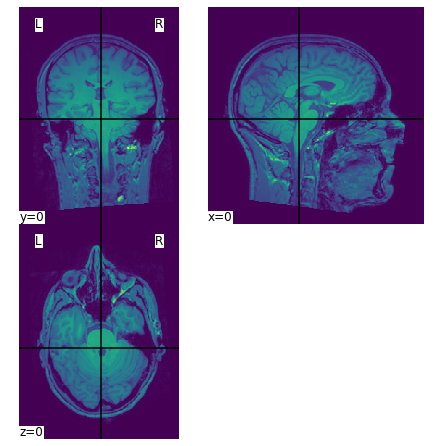

In [216]:
from nilearn.plotting import view_img, glass_brain, plot_anat, plot_epi
display = plotting.plot_img(image, display_mode ='tiled', cut_coords=[0,0,0])

In [223]:
x = 0
y = 0
z = 15
x_rot = np.radians(x)
y_rot = np.radians(y)
z_rot = np.radians(z)
Mx = euler2mat(x=x_rot)
My = euler2mat(y=y_rot)
Mz = euler2mat(z=z_rot)
orig_to_new = Mz.dot(My).dot(Mx)
new_to_orig = npl.inv(orig_to_new)
rotated_vol0 = affine_transform(sample_data, new_to_orig, order=1)
new_img = nib.Nifti1Image(rotated_vol0, sample.affine, sample.header)

In [237]:
print(sample.header.get('pixdim')[1])

0.9375


In [245]:
print(image.affine)

[[0.04 -0.07 1.20 -88.56]
 [-0.93 0.12 0.06 118.76]
 [0.13 0.93 0.08 -135.80]
 [0.00 0.00 0.00 1.00]]


In [244]:
from nilearn.image import resample_img
sample_in_mm_space = resample_img(sample, target_affine=np.eye(4),
                               target_shape=(384, 384, 225))
pixel_dimensions = sample.header.get('pixdim')
target_affine_4x4 = np.eye(4) * sample.affine
print(target_affine_4x4)

C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


[[0.00 0.00 0.00 -0.00]
 [-0.00 0.12 0.00 0.00]
 [0.00 0.00 -0.00 -0.00]
 [0.00 0.00 0.00 1.00]]


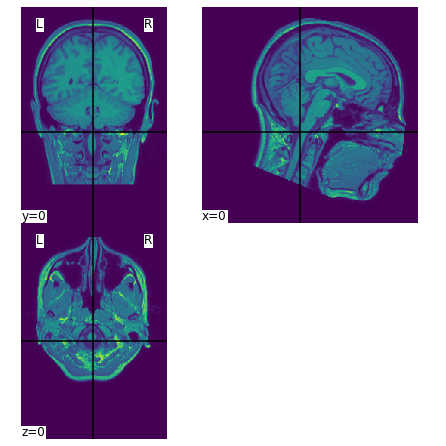

In [224]:
display = plotting.plot_img(new_img, display_mode ='tiled', cut_coords=[0,0,0])

In [247]:
individuals[0]

'../IXI-T1\\IXI002-Guys-0828-T1.nii.gz'

In [335]:
image = itk.imread(individuals[0])
view(image, rotate=True)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageSS3; proxy …

In [261]:
#print(image.GetSize())
print(image.GetOrigin())
print(image.GetSpacing())
print(image.GetDirection())
print(image.GetNumberOfComponentsPerPixel())

itkPointD3 ([88.6399, -116.532, -112.114])
itkVectorD3 ([0.9375, 0.9375, 1.2])
<itkMatrixPython.itkMatrixD33; proxy of <Swig Object of type 'itkMatrixD33 *' at 0x000001CD52FE1B70> >
1


In [336]:
import SimpleITK as sitk
def resample(image, transform):
    """
    This function resamples (updates) an image using a specified transform
    :param image: The sitk image we are trying to transform
    :param transform: An sitk transform (ex. resizing, rotation, etc.
    :return: The transformed sitk image
    """
    reference_image = image
    interpolator = sitk.sitkBSpline
    default_value = 0
    return sitk.Resample(image, reference_image, transform,
                         interpolator, default_value)


def get_center(img):
    """
    This function returns the physical center point of a 3d sitk image
    :param img: The sitk image we are trying to find the center of
    :return: The physical center point of the image
    """
    width, height, depth = img.GetSize()
    return img.TransformIndexToPhysicalPoint((int(np.ceil(width/2)),
                                              int(np.ceil(height/2)),
                                              int(np.ceil(depth/2))))


def rotation3d(image, theta_x, theta_y, theta_z, show=False):
    """
    This function rotates an image across each of the x, y, z axes by theta_x, theta_y, and theta_z degrees
    respectively
    :param image: An sitk MRI image
    :param theta_x: The amount of degrees the user wants the image rotated around the x axis
    :param theta_y: The amount of degrees the user wants the image rotated around the y axis
    :param theta_z: The amount of degrees the user wants the image rotated around the z axis
    :param show: Boolean, whether or not the user wants to see the result of the rotation
    :return: The rotated image
    """
    theta_x = np.deg2rad(theta_x)
    theta_y = np.deg2rad(theta_y)
    theta_z = np.deg2rad(theta_z)
    euler_transform = sitk.Euler3DTransform(get_center(image), theta_x, theta_y, theta_z, (0, 0, 0))
    image_center = get_center(image)
    euler_transform.SetCenter(image_center)
    euler_transform.SetRotation(theta_x, theta_y, theta_z)
    resampled_image = resample(image, euler_transform)
    
   
    if show:
        plt.imshow(sitk.GetArrayFromImage(resampled_image)[0])
        plt.show()
    return resampled_image

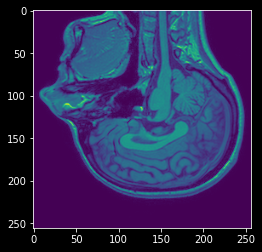

In [337]:
img = sitk.ReadImage(individuals[0])
img_arr = sitk.GetArrayFromImage(img)[75,:,:] # Represents the 0th slice, since numpy swaps the first and third axes default to sitk
plt.imshow(img_arr); plt.show()


Press enter to continue...


<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x000001CD600F2E40> >

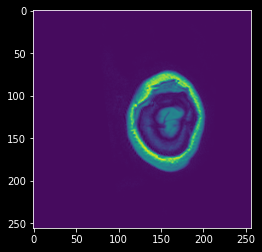

In [338]:
input("Press enter to continue...")
rotation3d(img, 0, 0, 45, show=True)

In [339]:
# This function is from https://github.com/rock-learning/pytransform3d/blob/7589e083a50597a75b12d745ebacaa7cc056cfbd/pytransform3d/rotations.py#L302

def matrix_from_axis_angle(a):
    """ Compute rotation matrix from axis-angle.
    This is called exponential map or Rodrigues' formula.
    Parameters
    ----------
    a : array-like, shape (4,)
        Axis of rotation and rotation angle: (x, y, z, angle)
    Returns
    -------
    R : array-like, shape (3, 3)
        Rotation matrix
    """
    ux, uy, uz, theta = a
    c = np.cos(theta)
    s = np.sin(theta)
    ci = 1.0 - c
    R = np.array([[ci * ux * ux + c,
                   ci * ux * uy - uz * s,
                   ci * ux * uz + uy * s],
                  [ci * uy * ux + uz * s,
                   ci * uy * uy + c,
                   ci * uy * uz - ux * s],
                  [ci * uz * ux - uy * s,
                   ci * uz * uy + ux * s,
                   ci * uz * uz + c],
                  ])

    # This is equivalent to
    # R = (np.eye(3) * np.cos(theta) +
    #      (1.0 - np.cos(theta)) * a[:3, np.newaxis].dot(a[np.newaxis, :3]) +
    #      cross_product_matrix(a[:3]) * np.sin(theta))

    return R


def resample(image, transform):
    """
    This function resamples (updates) an image using a specified transform
    :param image: The sitk image we are trying to transform
    :param transform: An sitk transform (ex. resizing, rotation, etc.
    :return: The transformed sitk image
    """
    reference_image = image
    interpolator = sitk.sitkLinear
    default_value = 0
    return sitk.Resample(image, reference_image, transform,
                         interpolator, default_value)


def get_center(img):
    """
    This function returns the physical center point of a 3d sitk image
    :param img: The sitk image we are trying to find the center of
    :return: The physical center point of the image
    """
    width, height, depth = img.GetSize()
    return img.TransformIndexToPhysicalPoint((int(np.ceil(width/2)),
                                              int(np.ceil(height/2)),
                                              int(np.ceil(depth/2))))


def rotation3d(image, theta_x, theta_y, theta_z, show=False):
    """
    This function rotates an image across each of the x, y, z axes by theta_x, theta_y, and theta_z degrees
    respectively
    :param image: An sitk MRI image
    :param theta_x: The amount of degrees the user wants the image rotated around the x axis
    :param theta_y: The amount of degrees the user wants the image rotated around the y axis
    :param theta_z: The amount of degrees the user wants the image rotated around the z axis
    :param show: Boolean, whether or not the user wants to see the result of the rotation
    :return: The rotated image
    """
    theta_x = np.deg2rad(theta_x)
    theta_y = np.deg2rad(theta_y)
    theta_z = np.deg2rad(theta_z)
    euler_transform = sitk.Euler3DTransform()
    print(euler_transform.GetMatrix())
    image_center = get_center(image)
    euler_transform.SetCenter(image_center)

    direction = image.GetDirection()
    axis_angle_x = (direction[0], direction[3], direction[6], theta_x)
    axis_angle_y = (direction[1], direction[4], direction[7], theta_y)
    axis_angle_z = (direction[2], direction[5], direction[8], theta_z)
    np_rot_mat_x = matrix_from_axis_angle(axis_angle_x)
    np_rot_mat_y = matrix_from_axis_angle(axis_angle_y)
    np_rot_mat_z = matrix_from_axis_angle(axis_angle_z)
    euler_transform.SetMatrix(np_rot_mat_x.dot(np_rot_mat_y).dot(np_rot_mat_z).flatten().tolist())
    resampled_image = resample(image, euler_transform)
    if show:
        slice_num = int(input("Enter the index of the slice you would like to see"))
        plt.imshow(sitk.GetArrayFromImage(resampled_image)[slice_num])
        plt.show()
    return resampled_image

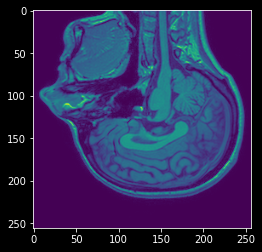

In [367]:
img = sitk.ReadImage(individuals[0])
img_arr = sitk.GetArrayFromImage(img)[75] # Represents the 0th slice, since numpy swaps the first and third axes default to sitk
plt.imshow(img_arr)
plt.show()

In [333]:
np.array(img.GetDirection()).reshape(3,3)

array([[-0.0000, -0.0000, -1.0000],
       [0.9924, -0.1232, -0.0000],
       [0.1232, 0.9924, -0.0000]])

In [344]:
resampled_img = rotation3d(img, 30, 0, 0)

(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


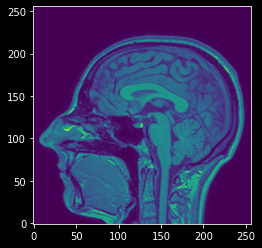

In [379]:
img_arr = sitk.GetArrayFromImage(img)[75,:,:] # Represents the 0th slice, since numpy swaps the first and third axes default to sitk
plt.imshow(img_arr, origin='lower')
plt.show()

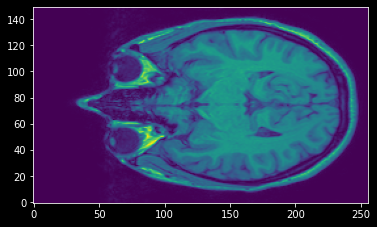

In [380]:
img_arr = sitk.GetArrayFromImage(img)[:,128,:] # Represents the 0th slice, since numpy swaps the first and third axes default to sitk
plt.imshow(img_arr, origin='lower')
plt.show()

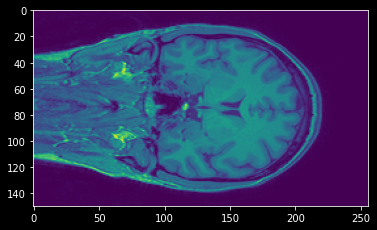

In [370]:
img_arr = sitk.GetArrayFromImage(img)[:,:,128] # Represents the 0th slice, since numpy swaps the first and third axes default to sitk
plt.imshow(img_arr)
plt.show()

Press enter to continue...
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


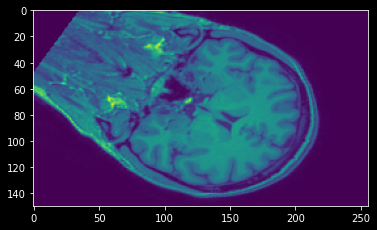

In [372]:
input("Press enter to continue...")
img2 = rotation3d(img, 30, 0, 0)
img_arr = sitk.GetArrayFromImage(img2)[:,:,128] # Represents the 0th slice, since numpy swaps the first and third axes default to sitk
plt.imshow(img_arr)
plt.show()


(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


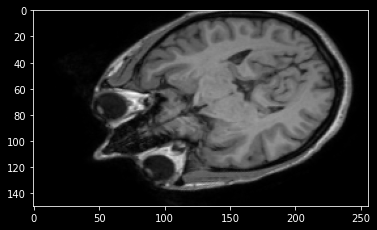

In [376]:
img3 = rotation3d(img, 0, 30, 0)
img_arr = sitk.GetArrayFromImage(img3)[:,128,:] # Represents the 0th slice, since numpy swaps the first and third axes default to sitk
plt.imshow(img_arr, cmap='gray')
plt.show()


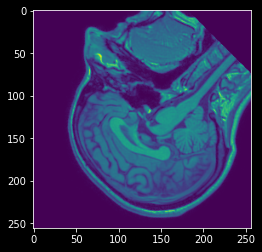

In [322]:
plt.imshow(sitk.GetArrayFromImage(resampled_img)[75])

In [323]:
view(resampled_img, rotate=False)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageSS3; proxy …